In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
flight_df = pd.read_csv('flights.csv')

# Data Exploration

In [5]:
# Check columns and data types
flight_df.dtypes

id                  int64
year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
name               object
dtype: object

In [14]:
#Preview data
flight_df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [63]:
# descriptive overview
flight_df.describe()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,168387.500000,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,97219.001466,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,0.000000,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,84193.750000,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,168387.500000,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,252581.250000,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,336775.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [26]:
#check value of object columns
def check_count(df, column_name):
    check_df = df.groupby(column_name)['id'].nunique().reset_index(name='Count').sort_values(by='Count', ascending = False)
    print(f'{column_name} summary:\n', check_df)

In [27]:
col_list = ['name', 'origin', 'dest', 'carrier', 'hour']
for col in col_list:
    print(check_count(flight_df, col))

name summary:
                            name  Count
14        United Air Lines Inc.  58665
9               JetBlue Airways  54635
6      ExpressJet Airlines Inc.  54173
3          Delta Air Lines Inc.  48110
2        American Airlines Inc.  32729
5                     Envoy Air  26397
13              US Airways Inc.  20536
4             Endeavor Air Inc.  18460
12       Southwest Airlines Co.  12275
15               Virgin America   5162
0   AirTran Airways Corporation   3260
1          Alaska Airlines Inc.    714
7        Frontier Airlines Inc.    685
10           Mesa Airlines Inc.    601
8        Hawaiian Airlines Inc.    342
11        SkyWest Airlines Inc.     32
None
origin summary:
   origin   Count
0    EWR  120835
1    JFK  111279
2    LGA  104662
None
dest summary:
    dest  Count
69  ORD  17283
4   ATL  17215
49  LAX  16174
11  BOS  15508
54  MCO  14082
..  ...    ...
63  MTJ     15
87  SBN     10
3   ANC      8
51  LGA      1
50  LEX      1

[105 rows x 2 columns]
None
car

In [4]:
# function to check null and empty values in all columns
def nul_empty_check(df):
    #check null
    null_values = df.isnull().sum()
    print("Null values in column:\n", null_values)
    
    #check empty
    empty_strings = df.applymap(lambda x: x=='').sum()
    print("\nEmty strings in each column:\n", empty_strings)

In [5]:
nul_empty_check(flight_df)

Null values in column:
 id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

Emty strings in each column:
 id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
dtype: int64


#### There are some null values in dep_time, arr_time & air_time, leading to null values in departure delay column. Let's filter out null dep_time, arr_time and air_time to enhance the data quality

In [6]:
flight_clean = flight_df[(flight_df["dep_time"].notnull()) &
                       (flight_df["arr_time"].notnull()) &
                       (flight_df["air_time"].notnull())]

#### Create a flight date from year, month, day column and day of week from flight date. These columns will be used to analyse the performance trend by day of week and hour of day.

In [7]:
flight_clean = flight_clean.copy()
flight_clean["flight_date"] = pd.to_datetime(flight_clean[['year', 'month', 'day']])
flight_clean['day_of_week'] = flight_clean['flight_date'].dt.day_name()
flight_clean.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,origin,dest,air_time,distance,hour,minute,time_hour,name,flight_date,day_of_week
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.,2013-01-01,Tuesday
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.,2013-01-01,Tuesday
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.,2013-01-01,Tuesday
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways,2013-01-01,Tuesday
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.,2013-01-01,Tuesday


In [24]:
nul_empty_check(flight_clean)

Null values in column:
 id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
flight_date       0
day_of_week       0
dtype: int64

Emty strings in each column:
 id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
flight_date       0
day_of_week       0
dtype: int64

In [25]:
def distribution_df(df, column_name):
    plt.figure(figsize=(5, 3))
    df[column_name].plot(kind='hist', bins=100, edgecolor='black')
    plt.title(f'{column_name} Distribution')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)

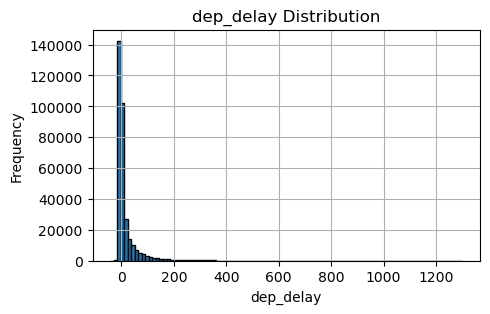

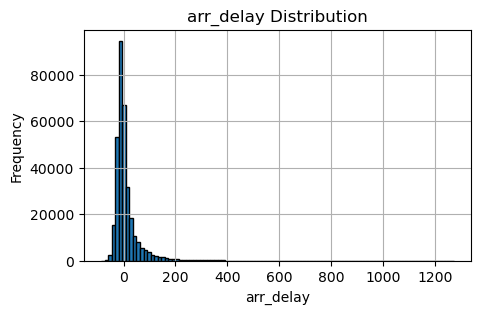

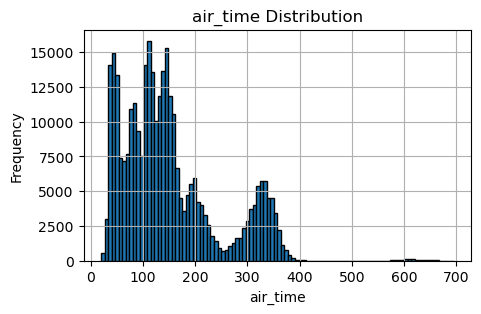

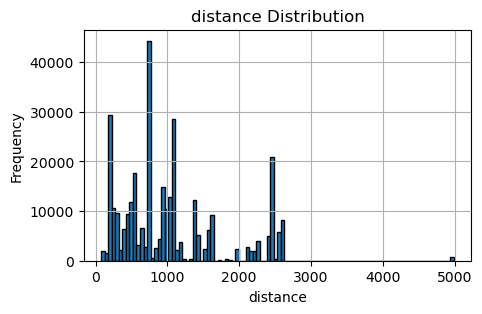

In [27]:
selected_columns = ['dep_delay', 'arr_delay', 'air_time', 'distance']
for col in selected_columns:
    distribution_df(flight_clean, col)

In [57]:
def bar_chart_visual(df, category_name, value_column):
    count_df = df.groupby(category_name)[value_column].count()
    plt.figure(figsize=(5, 3))
    count_df.plot(kind='bar', x=category_name, y=value_column, legend=False)
    plt.title(f'{value_column} by {category_name}')
    plt.xlabel(category_name)
    plt.ylabel('Count')
    plt.grid(False)

In [29]:
cate_col = ['month', 'name', 'day', 'origin']

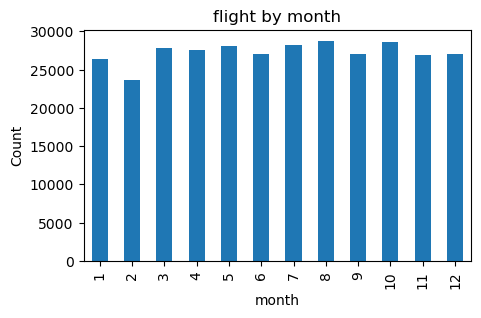

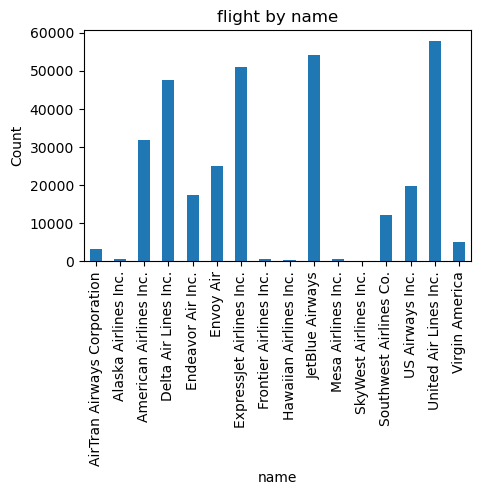

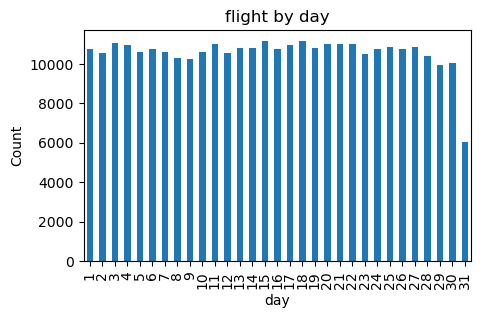

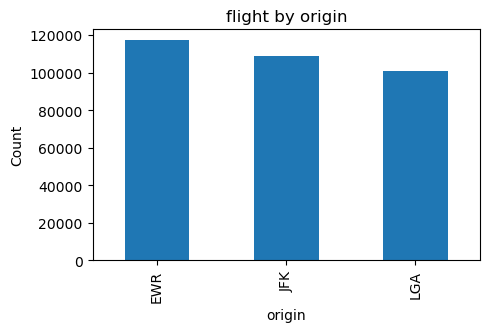

In [30]:
for category in cate_col:
    bar_chart_visual(flight_clean, category, "flight")

# Analysis Questions:


### 1. What is the on-time performance trend by month?
### 2. What is the on-time performance trend by the day of the month?
### 3. What is the on-time performance trend by the day of the week?
### 4. What is the on-time performance trend by the hour of the day?

### FUNCTION

In [10]:
## aggregated functions
def data_aggregation(df, column_name1, column_name2=None):
    df['departure_ontime_check'] = ((df['dep_delay'] < 15) & (df['arr_delay'] < 15)).astype(int)
    
    if column_name2:
        grouped_df = df.groupby([column_name1, column_name2])
    else:
        grouped_df = df.groupby(column_name1)
    
    agg_df = grouped_df.agg(
        all_flight=pd.NamedAgg(column='id', aggfunc='count'),
        departure_ontime=pd.NamedAgg(column='departure_ontime_check', aggfunc='sum')
    ).reset_index()
    
    agg_df['dep_ontime_rate'] = (agg_df['departure_ontime']/agg_df['all_flight'])*100
    
    return agg_df

In [11]:
## boxplot visualization functions
def boxplot_visualization(df, by_column, cat=None):
    plt.figure(figsize=(20, 10))
    
    if cat is not None:
        df[by_column] = pd.Categorical(df[by_column], categories=cat, ordered=True)

    df[by_column] = pd.Categorical(df[by_column], categories=cat, ordered=True)
    df.boxplot(by=by_column, column=['dep_ontime_rate'], grid=False)
    plt.title(f'Ontime Performance Trend By {by_column}')
    plt.xlabel(by_column)
    plt.ylabel('Ontime Rate')
    plt.suptitle('')

### Question 1. What is the on-time performance trend by months?

In [35]:
ontime_agg_df = data_aggregation(flight_clean, 'month')
average_rate = ontime_agg_df['dep_ontime_rate'].mean()
ontime_agg_df.head()

,month,all_flight,departure_ontime,dep_ontime_rate
0,1,26398,19335,73.244185
1,2,23611,16983,71.928338
2,3,27902,19994,71.657946
3,4,27564,18731,67.954578
4,5,28128,20149,71.633248


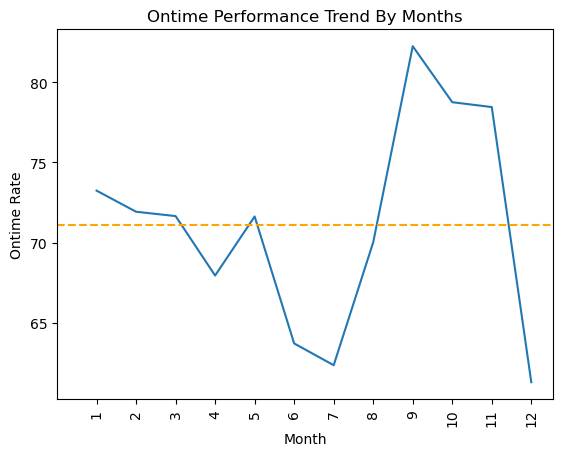

In [36]:
# plt.figure(figsize=(5, 3))
ontime_agg_df.plot(kind='line', x='month', y=['dep_ontime_rate'], legend=False)
plt.axhline(y=average_rate, color='orange', linestyle='--', label=f'Average Rate ({average_rate:.2f})')
plt.xticks(ticks=range(1, len(ontime_agg_df['month']) + 1), labels=ontime_agg_df['month'], rotation=90)
plt.xlim(left=0)
plt.title('Ontime Performance Trend By Months')
plt.xlabel('Month')
plt.ylabel('Ontime Rate')
plt.show()


### Question 2. What is the on-time performance trend by the days of month?

In [14]:
ontime_agg_day_df = data_aggregation(flight_clean, 'day', 'month')
ontime_agg_day_df.head()

ontime_agg_day_df.dtypes
ontime_agg_day_df.describe()

,day,month,all_flight,departure_ontime,dep_ontime_rate
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,15.720548,6.526027,896.838356,637.542466,71.015779
std,8.808321,3.452584,98.249367,151.689864,14.875419
min,1.000000,1.000000,291.000000,126.000000,15.789474
25%,8.000000,4.000000,864.000000,545.000000,62.142857
50%,16.000000,7.000000,929.000000,658.000000,75.108225
75%,23.000000,10.000000,967.000000,755.000000,82.287308
max,31.000000,12.000000,998.000000,900.000000,92.497431


day                 category
month                  int64
all_flight             int64
departure_ontime       int64
dep_ontime_rate      float64
dtype: object

<Figure size 2000x1000 with 0 Axes>

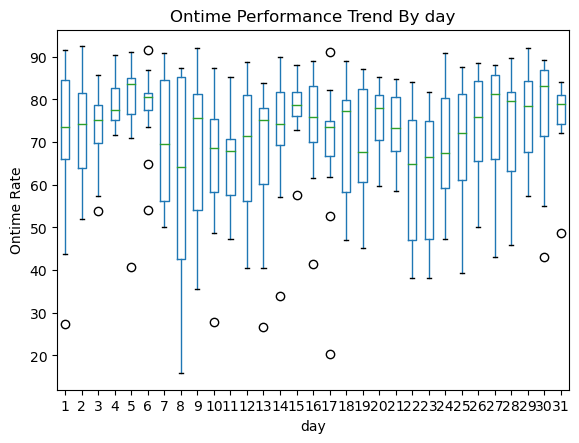

In [15]:
boxplot_visualization(ontime_agg_day_df, 'day')
ontime_agg_day_df.describe()
ontime_agg_day_df.dtypes

### Question 3:  What is the on-time performance trend by the day of the week?

In [39]:
ontime_agg_day_df = data_aggregation(flight_clean, 'day_of_week', 'month')
ontime_agg_day_df.head()

,day_of_week,month,all_flight,departure_ontime,dep_ontime_rate
0,Friday,1,3614,2718,75.207526
1,Friday,2,3246,2210,68.083795
2,Friday,3,4654,3102,66.652342
3,Friday,4,3743,1956,52.257547
4,Friday,5,4819,3308,68.644947


<Figure size 1000x600 with 0 Axes>

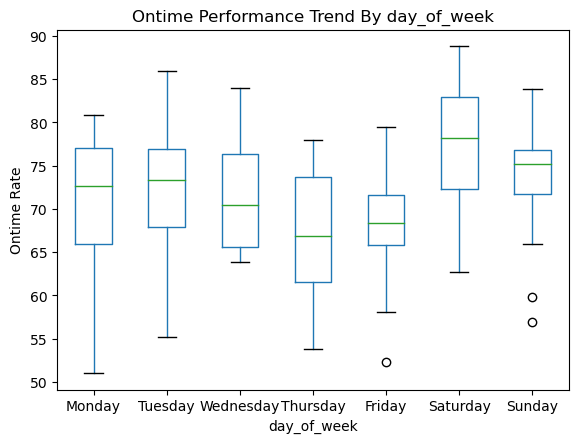

In [40]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
boxplot_visualization(ontime_agg_day_df, 'day_of_week', days_order)

### Question 4: What is the on-time performance trend by the hour of the day?

In [12]:
ontime_agg_hour_df = data_aggregation(flight_clean, 'flight_date', 'hour')
ontime_agg_hour_df.head()

,flight_date,hour,all_flight,departure_ontime,dep_ontime_rate
0,2013-01-01,5,6,4,66.666667
1,2013-01-01,6,51,41,80.392157
2,2013-01-01,7,49,39,79.591837
3,2013-01-01,8,58,45,77.586207
4,2013-01-01,9,56,40,71.428571


<Figure size 2000x1000 with 0 Axes>

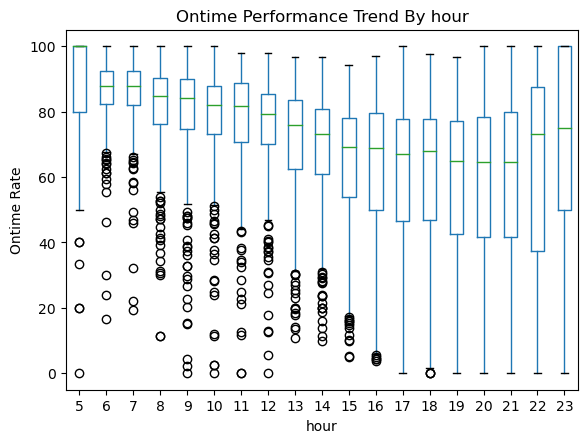

In [13]:
boxplot_visualization(ontime_agg_hour_df, 'hour')